In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import scipy.stats as stats

import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")
plt. figure(figsize=(2, 1))

<Figure size 200x100 with 0 Axes>

<Figure size 200x100 with 0 Axes>

In [37]:
data = pd.read_csv('Data.csv')
print(data.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [38]:
# Basic exploration
print(data.shape)
print(data.info())
print(data.describe().drop(['count']).round(1))
# print(data.isnull().sum())

# Education: 1 (Below College), 2 (College), 3 (Bachelor), 4 (Master), 5 (Doctor)
# Environment Satisfaction: 1 (Low), 2 (Medium), 3 (High), 4 (Very High)
# Job Involvement: 1 (Low), 2 (Medium), 3(High), 4 (Very High)
# Job Satisfaction: 1 (Low),2(Medium),3 (High), 4 (Very High)
# Performance Rating: 1 (Low), 2 (Good), 3 (Excellent), 4 (Outstanding)
# Relationship Satisfaction: 1 (Low), 2(Medium), 3 (High), 4 (Very High)
# Work-Life Balance: 1 (Bad), 2 (Good), 3 (Better), 4 (Best)

(1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel     

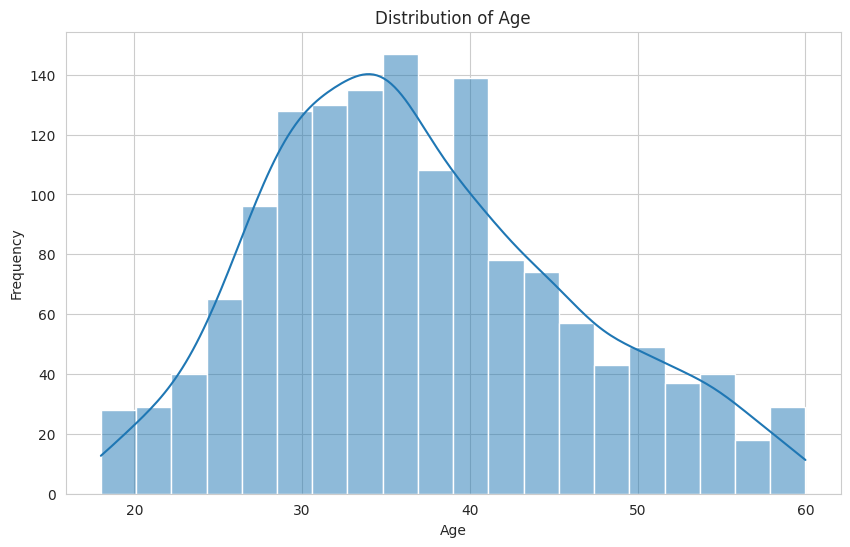

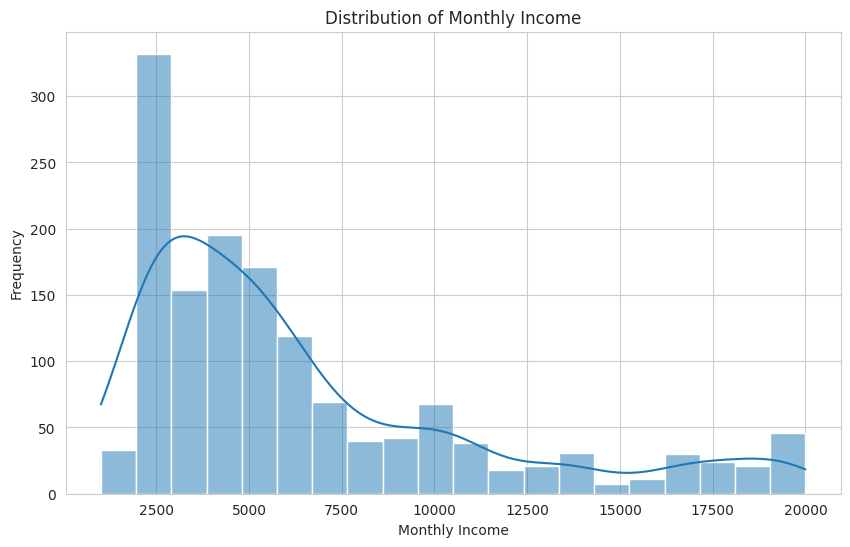

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of Monthly Income
plt.figure(figsize=(10, 6))
sns.histplot(data['MonthlyIncome'], bins=20, kde=True)
plt.title('Distribution of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.show()


In [44]:
# label_encoder = LabelEncoder()
# categorical_cols = [
#     "Attrition",
#     "BusinessTravel",
#     "Department",
#     "EducationField",
#     "Gender",
#     "JobRole",
#     "MaritalStatus",
#     "Over18",
#     "OverTime",
# ]
# for col in categorical_cols:
#     data[col] = label_encoder.fit_transform(data[col])
# print(data.head())

   Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EmployeeCount  EmployeeNumber  ...  \
0          2               1              1               1  ...   
1          1               1              1               2  ...   
2          2               4              1               4  ...   
3          4               1              1               5  ...   
4          1               3              1               7  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1             80                

In [45]:
# for col in categorical_cols:
#     print(f"Distribution for {col}:")
#     print(data[col].value_counts())
#     print()

Distribution for Attrition:
0    1233
1     237
Name: Attrition, dtype: int64

Distribution for BusinessTravel:
2    1043
1     277
0     150
Name: BusinessTravel, dtype: int64

Distribution for Department:
1    961
2    446
0     63
Name: Department, dtype: int64

Distribution for EducationField:
1    606
3    464
2    159
5    132
4     82
0     27
Name: EducationField, dtype: int64

Distribution for Gender:
1    882
0    588
Name: Gender, dtype: int64

Distribution for JobRole:
7    326
6    292
2    259
4    145
0    131
3    102
8     83
5     80
1     52
Name: JobRole, dtype: int64

Distribution for MaritalStatus:
1    673
2    470
0    327
Name: MaritalStatus, dtype: int64

Distribution for Over18:
0    1470
Name: Over18, dtype: int64

Distribution for OverTime:
0    1054
1     416
Name: OverTime, dtype: int64



   Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               0       1102           0                 1   
1   49          0               1        279           1                 8   
2   37          1               0       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               0        591           1                 2   

   Education  EducationField  EmployeeCount  EmployeeNumber  ...  \
0          2             0.0              1               1  ...   
1          1             0.0              1               2  ...   
2          2             3.0              1               4  ...   
3          4             0.0              1               5  ...   
4          1             1.0              1               7  ...   

   YearsSinceLastPromotion  YearsWithCurrManager  Attrition_Label  \
0                        0                     5     

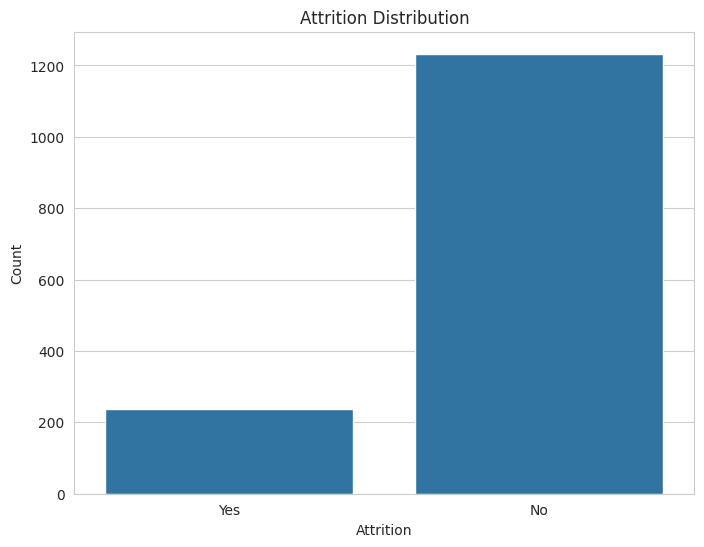

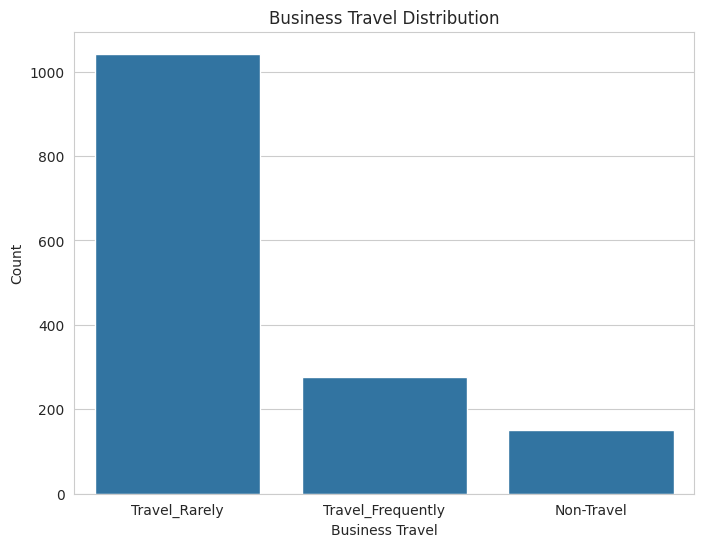

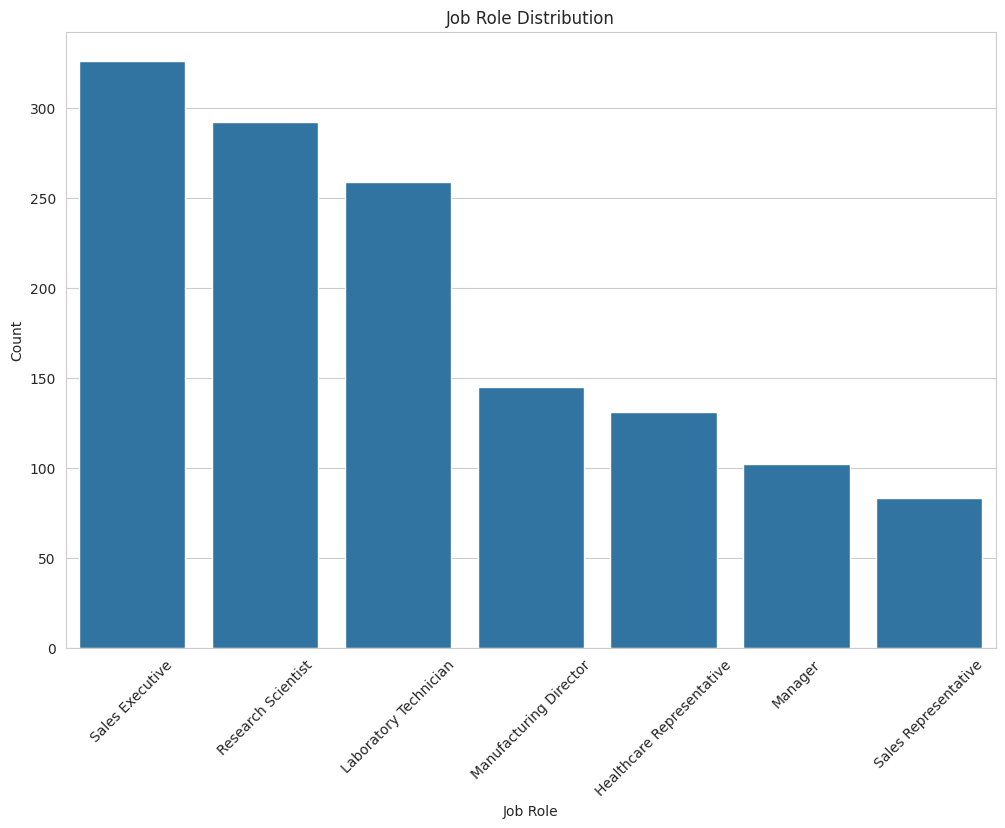

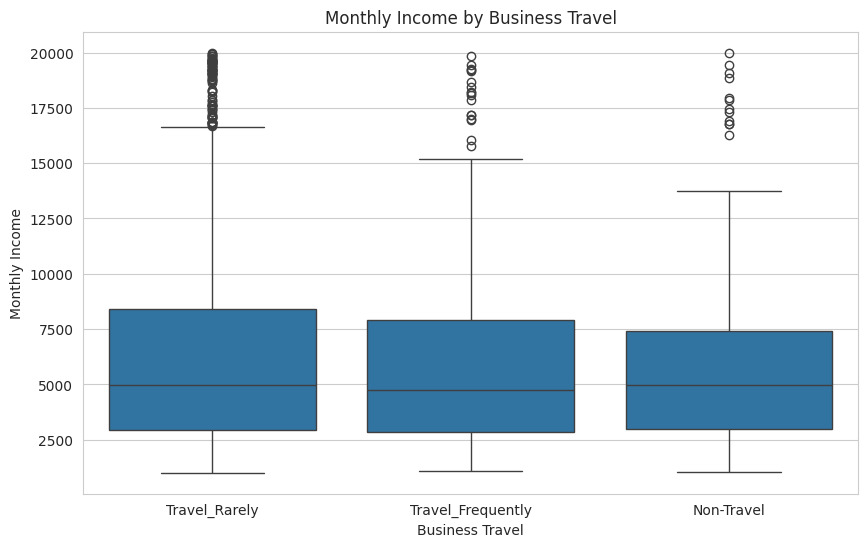

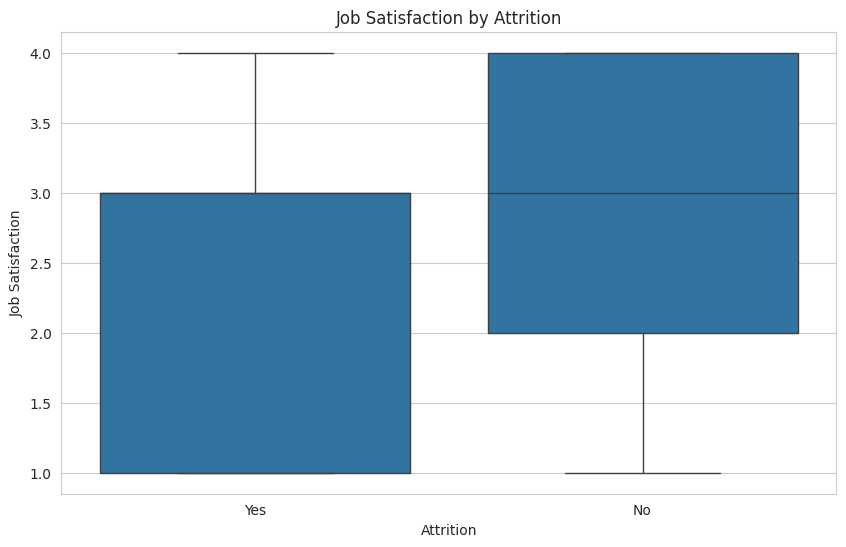

Chi-Square Statistic: 24.182413685655174
P-Value: 5.608614476449931e-06
Degrees of Freedom: 2
Expected Frequencies:
[[125.81632653 232.34081633 874.84285714]
 [ 24.18367347  44.65918367 168.15714286]]
There is a significant relationship between Attrition and Business Travel.


ValueError: could not convert string to float: 'Y'

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import scipy.stats as stats

# Load the data
data = pd.read_csv('Data.csv')  # Replace with your actual data file path

# Define and apply mapping dictionaries
attrition_map = {'Yes': 1, 'No': 0}
business_travel_map = {'Travel_Rarely': 0, 'Travel_Frequently': 1, 'Non-Travel': 2}
department_map = {'Sales': 0, 'Research & Development': 1, 'Human Resources': 2}
education_field_map = {'Life Sciences': 0, 'Medical': 1, 'Marketing': 2, 'Other': 3, 'Technical Degree': 4}
gender_map = {'Female': 0, 'Male': 1}
job_role_map = {'Sales Executive': 0, 'Research Scientist': 1, 'Laboratory Technician': 2,
                 'Manufacturing Director': 3, 'Healthcare Representative': 4, 'Manager': 5,
                 'IT Executive': 6, 'Sales Representative': 7}
marital_status_map = {'Single': 0, 'Married': 1, 'Divorced': 2}
overtime_map = {'Yes': 1, 'No': 0}

# Apply the mappings to the DataFrame
data['Attrition'] = data['Attrition'].map(attrition_map)
data['BusinessTravel'] = data['BusinessTravel'].map(business_travel_map)
data['Department'] = data['Department'].map(department_map)
data['EducationField'] = data['EducationField'].map(education_field_map)
data['Gender'] = data['Gender'].map(gender_map)
data['JobRole'] = data['JobRole'].map(job_role_map)
data['MaritalStatus'] = data['MaritalStatus'].map(marital_status_map)
data['OverTime'] = data['OverTime'].map(overtime_map)

# Check for non-numeric values
print(X.select_dtypes(include=['object']).head())
print(y.unique())

# Ensure there are no missing values
print(data.isnull().sum())

# Separate features and target
X = data.drop(['Attrition'], axis=1)
y = data['Attrition']

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
features = X.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importance_df)
